### Exploratory Data Analysis is the process of analyzing and summarizing datasets to uncover patterns, relationships, and insights while identifying anomalies or missing data.
### It involves visualization, statistical summaries, and transformations to better understand the data and guide decision-making or further analysis.

In [1]:
#import necessary libraries
import pandas as pd

In [46]:
#import datasets

In [2]:
customers = pd.read_csv('customers.csv') 
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

### EDA STEP-1 Clean the data and preprocess the data

In [53]:
print("Customers dataset null values\n",customers.isnull().sum()) 

Customers dataset null values
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [56]:
print("Products dataset null values\n",products.isnull().sum()) 

Products dataset null values
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [57]:
print("Transactions dataset null values\n",transactions.isnull().sum()) 

Transactions dataset null values
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [54]:
#NO NULL VALUES IN THE DATASET

### date-related analysis becomes more efficient and accurate.

In [14]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

### check for duplicates and drop them

In [15]:
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

In [16]:
print(customers)

    CustomerID        CustomerName         Region SignupDate
0        C0001    Lawrence Carroll  South America 2022-07-10
1        C0002      Elizabeth Lutz           Asia 2022-02-13
2        C0003      Michael Rivera  South America 2024-03-07
3        C0004  Kathleen Rodriguez  South America 2022-10-09
4        C0005         Laura Weber           Asia 2022-08-15
..         ...                 ...            ...        ...
195      C0196         Laura Watts         Europe 2022-06-07
196      C0197    Christina Harvey         Europe 2023-03-21
197      C0198         Rebecca Ray         Europe 2022-02-27
198      C0199      Andrea Jenkins         Europe 2022-12-03
199      C0200         Kelly Cross           Asia 2023-06-11

[200 rows x 4 columns]


### EDA STEP-2 MERGE DATA
### Merge the datasets to combine information from the Customer, Product, and Transaction datasets.They are related through shared keys like CustomerID  and ProductID.

In [17]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

### EDA STEP-3 SUMMARIZE THE DATA 

In [18]:
print("Summary of merged dataset:\n", merged_data.describe())


Summary of merged dataset:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%           

In [19]:
print("Top 5 transactions:\n", merged_data.head())

Top 5 transactions:
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetoot

### INSIGHT-1
### Top Revenue-Generating Products and Categories
### Analyzing TRANSACTION DATA reveals which products and categories contribute the most to revenue. Insights can inform inventory management and marketing focus.

In [20]:
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)


In [21]:
print("Top 5 revenue-generating products:\n", product_revenue.head())

Top 5 revenue-generating products:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 

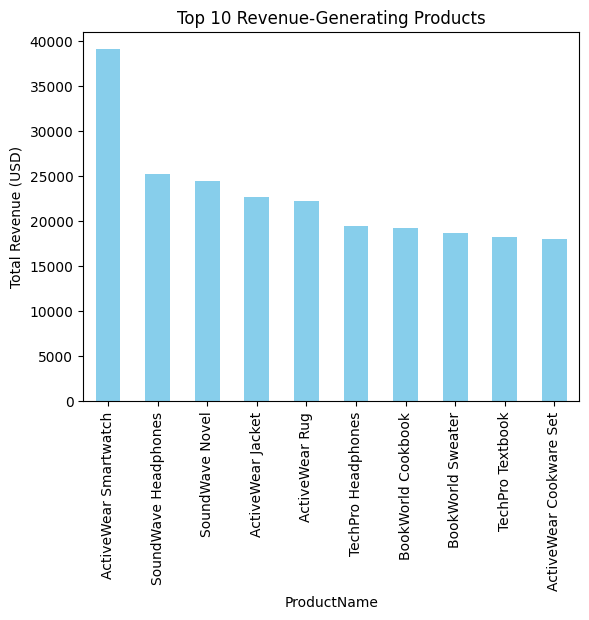

In [28]:
product_revenue.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Revenue-Generating Products')
plt.ylabel('Total Revenue (USD)')
plt.xticks()
plt.show()

### from above plot we can see ActiveWear SmartWatches are highest revenue

In [25]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)


In [26]:
print("Revenue by Category:\n", category_revenue)

Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


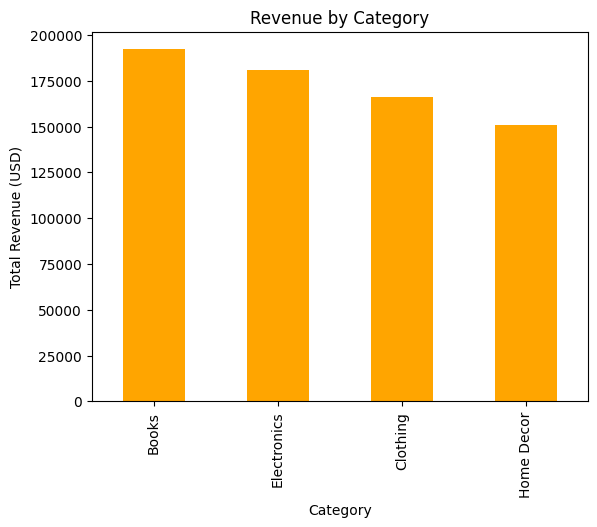

In [29]:
category_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks()
plt.show()

### Categorically Books are high revenue with nearly 200000(usd)

### INSIGHT-2
###  Customer Segmentation by Region
### By grouping customers by region and analyzing purchase patterns, businesses can tailor their promotions and allocate resources more effectively.

In [30]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)


In [31]:
print("Revenue by Region:\n", region_revenue)

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


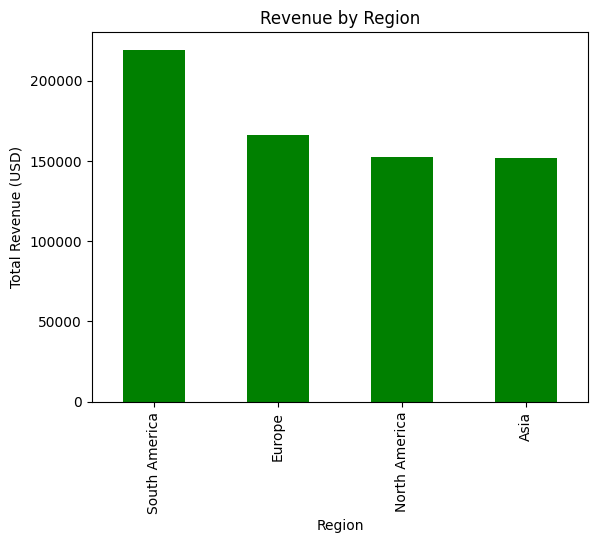

In [32]:
region_revenue.plot(kind='bar', color='green')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks()
plt.show()

### South America has highest revenue more than 2000000(usd) compared to other regions

### Insight-3
### Peak Purchase Periods
### Time-based transaction analysis uncovers periods of high sales. Businesses can optimize stock and marketing campaigns during these times.

In [33]:
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly sales trend:\n", monthly_sales)

Monthly sales trend:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


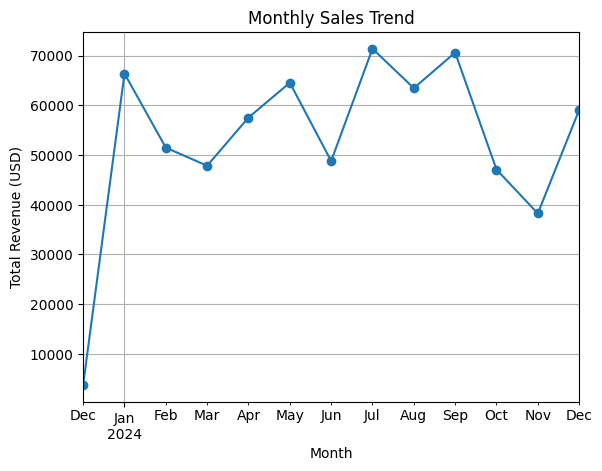

In [34]:
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Month')
plt.grid()
plt.show()

### Insight-4
### High-Value Customers
### Identifying customers with high lifetime value (based on cumulative spending) helps create targeted loyalty programs and personalized experiences.

In [35]:
customer_lifetime_value = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 high-value customers:\n", customer_lifetime_value.head())

Top 5 high-value customers:
 CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


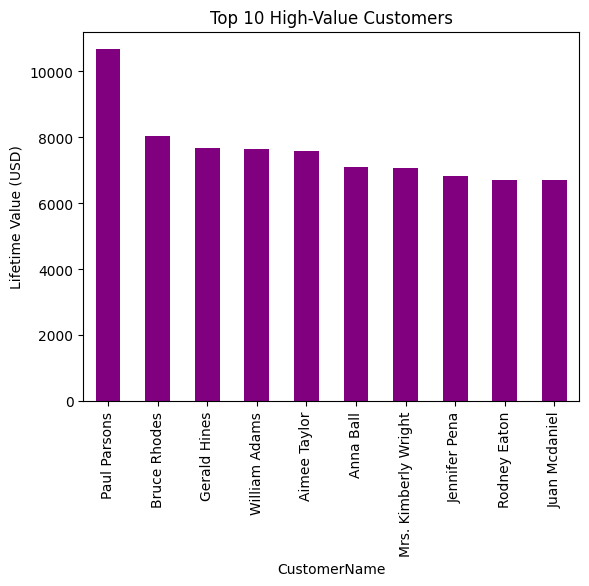

In [36]:
customer_lifetime_value.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 High-Value Customers')
plt.ylabel('Lifetime Value (USD)')
plt.xticks()
plt.show()

### Paul Parsons with more than 10000 usd has highest value now we can focus on this customer with more benefits like offers or discounts and moere personalized programs

### Insight-5
### Price vs Quantity Trends
### Evaluating the relationship between product price and quantity sold identifies price-sensitive products and aids in pricing strategies.

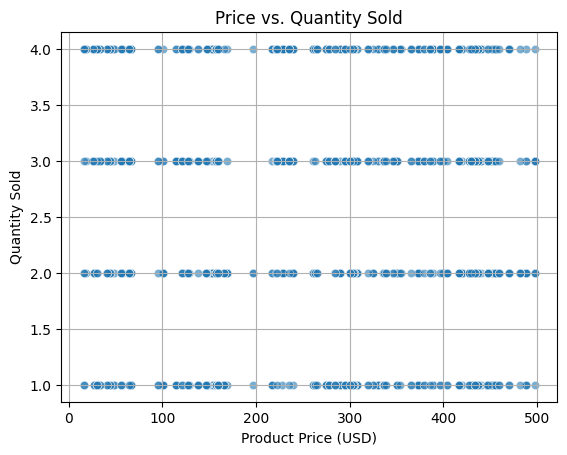

In [38]:
sns.scatterplot(data=merged_data, x='Price_', y='Quantity', alpha=0.6)
plt.title('Price vs. Quantity Sold')
plt.xlabel('Product Price (USD)')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

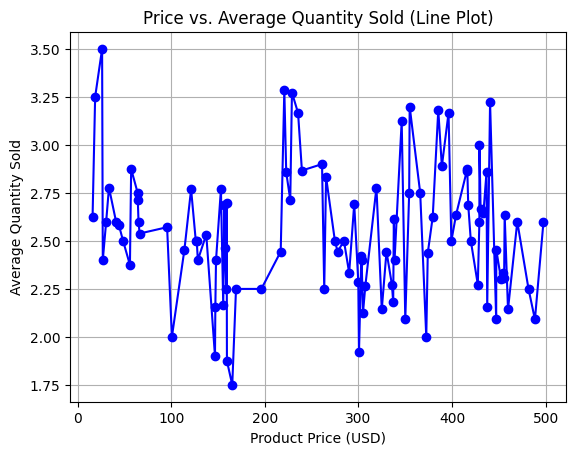

In [41]:
# Aggregating data
price_quantity_trend = merged_data.groupby('Price_x')['Quantity'].mean().sort_index()
price_quantity_trend.plot(kind='line', marker='o', color='blue')
plt.title('Price vs. Average Quantity Sold (Line Plot)')
plt.xlabel('Product Price (USD)')
plt.ylabel('Average Quantity Sold')
plt.grid()
plt.show()



### we can track price-sensitive products and optimize pricing strategies.Understanding these trends can guide discounting, bundling, and inventory decisions.